<a href="https://colab.research.google.com/github/SumanMishra0406/HR/blob/main/HR_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hr = pd.read_csv("HR-Employee-Attrition - HR-Employee-Attrition.csv")

In [ ]:
hr.shape

(1470, 35)

In [ ]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
hr = hr.drop(columns=['EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
hr = hr.apply(lambda col: LabelEncoder().fit_transform(col))

In [ ]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2


In [ ]:
print(hr.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


EDA

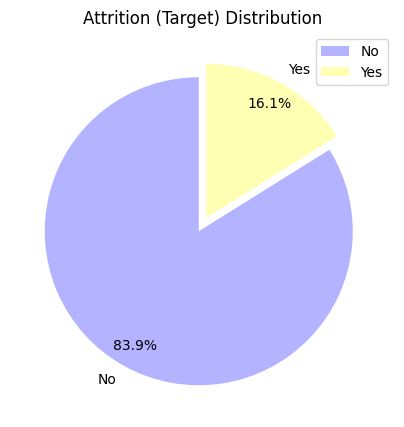

In [ ]:
colors = ['#b3b3ff', '#ffffb3']
explode = (0.05,0.05)
plt.figure(figsize=(5, 5))
plt.pie(hr['Attrition'].value_counts(), colors = colors, labels=['No', 'Yes'],
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
plt.legend()
plt.title("Attrition (Target) Distribution")
plt.show()

<ipython-input-40-3e0fe04b2f9d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hr.corr(), annot=True, cmap="Greys", annot_kws={"size":15})


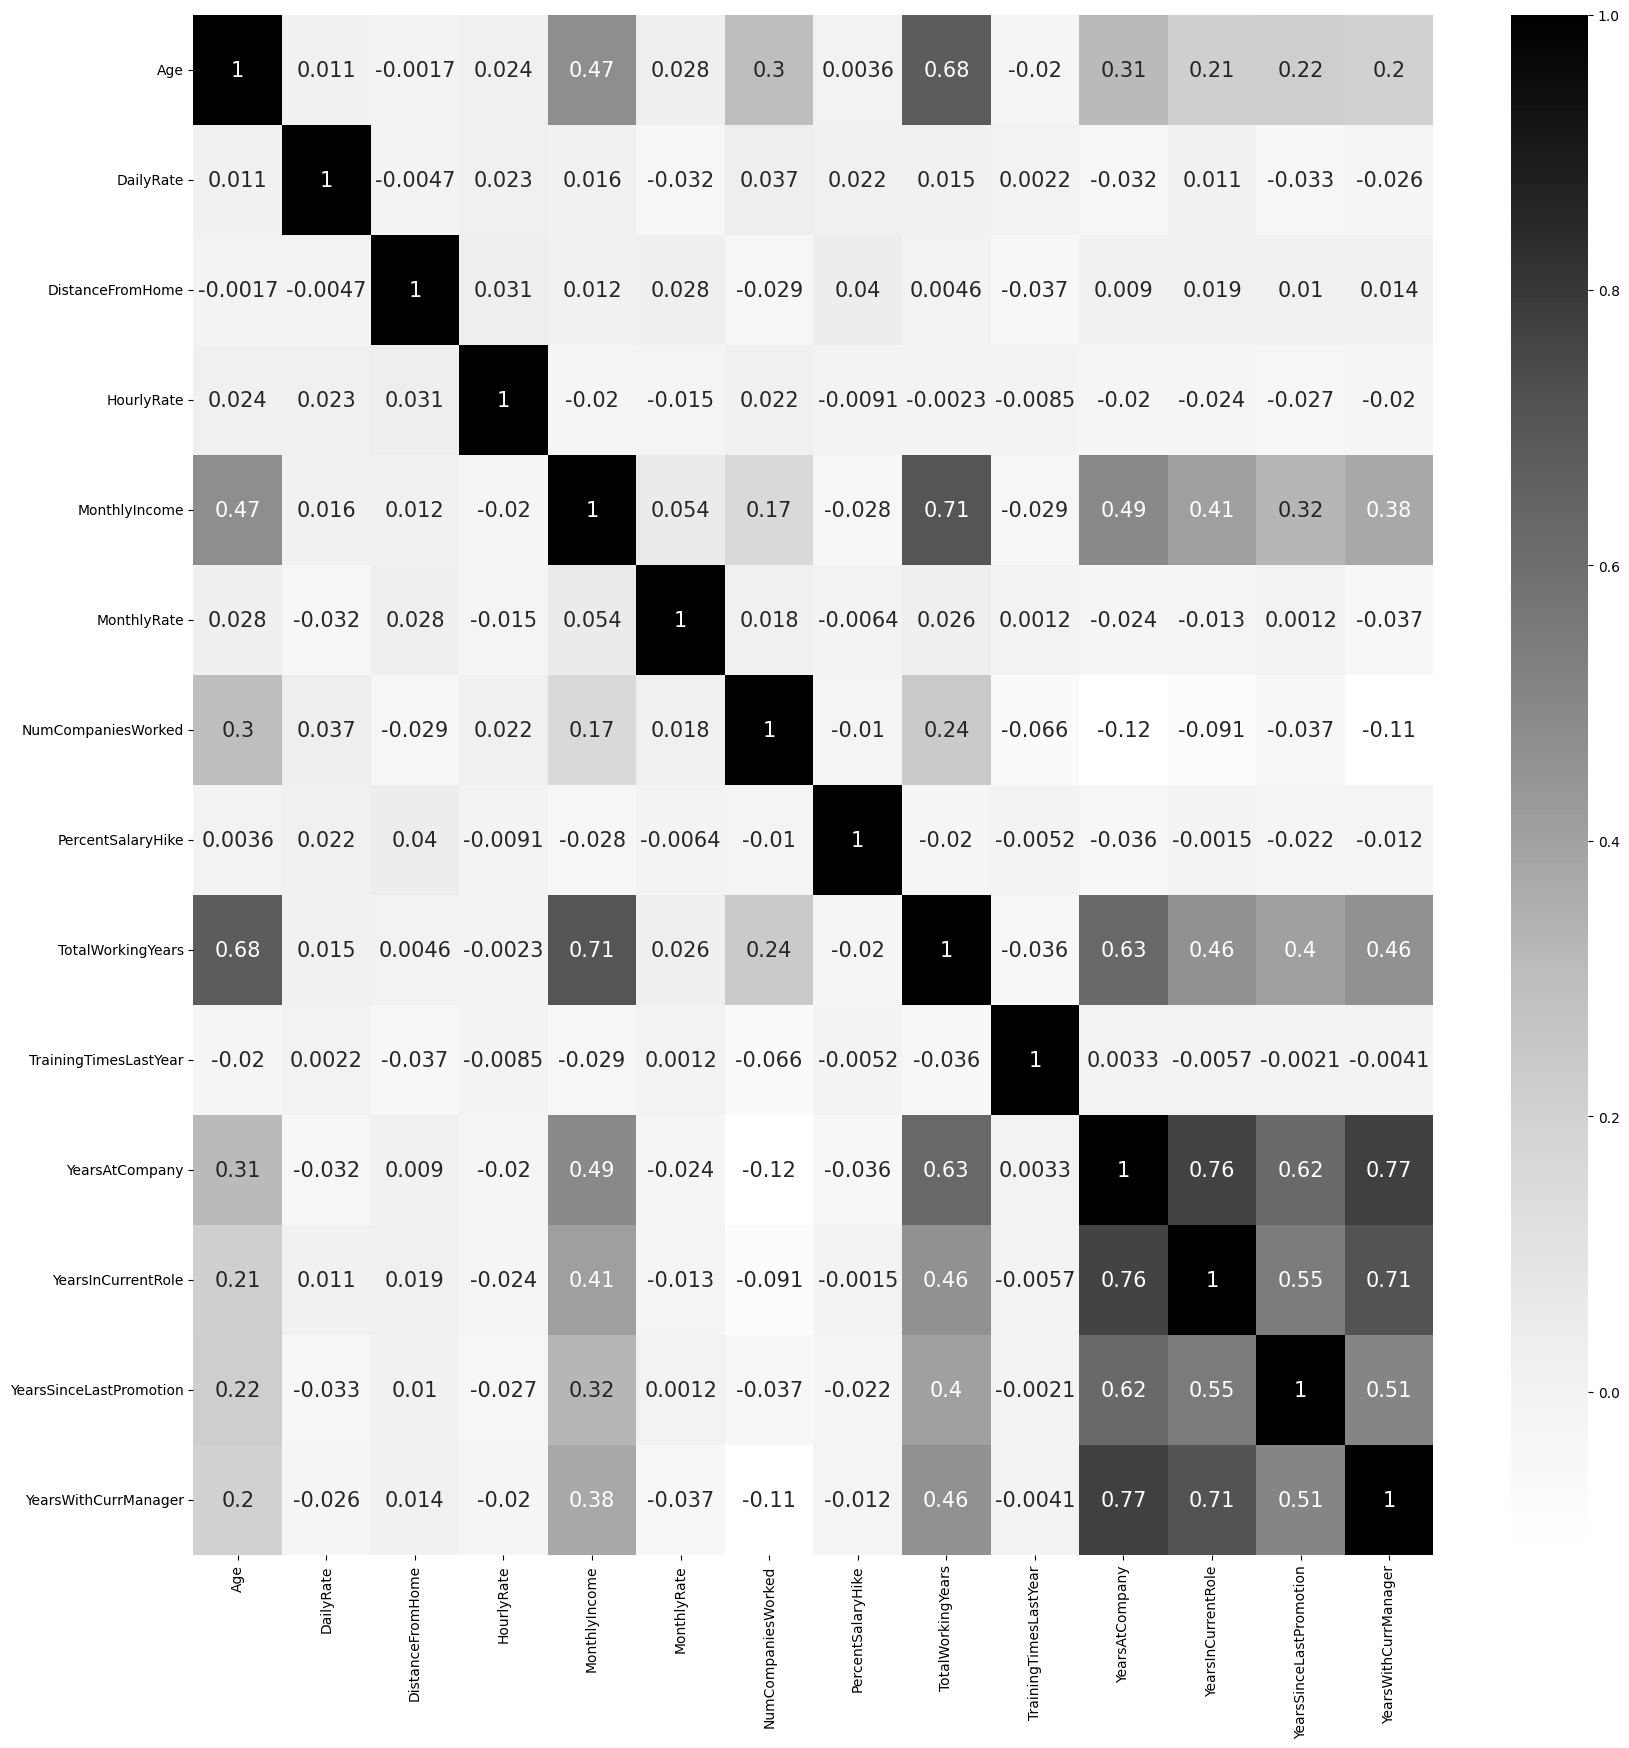

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(hr.corr(), annot=True, cmap="Greys", annot_kws={"size":15})
plt.show()

Decision Tree


In [ ]:
dummies = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(data=hr, columns=dummies)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2
0,23,1,2,624,0,1,1,0,64,2,...,0,0,0,0,0,1,0,0,0,1
1,31,0,1,113,7,0,2,1,31,1,...,0,0,0,0,1,0,0,0,1,0
2,19,1,2,805,1,1,3,1,62,1,...,1,0,0,0,0,0,0,0,0,1
3,15,0,1,820,2,3,3,0,26,2,...,0,0,0,0,1,0,0,0,1,0
4,9,0,2,312,1,0,0,1,10,2,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state = 80)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=80)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[366,   5],
       [ 57,  13]])

In [ ]:
accuracy_score(y_test,y_pred)*100

85.94104308390023

In [ ]:
def compute_auc(test,train_instance):
  probs = train_instance.predict_proba(test)
  prob_positive = probs[:,-1]
  fpr,tpr,threshold = roc_curve(y_test, prob_positive)
  roc_auc = auc(fpr,tpr)
  return roc_auc, fpr,tpr

In [ ]:
roc_auc,fpr,tpr = compute_auc(X_test, clf)
roc_auc

0.7063149788217173

In [ ]:
cols = X_train.columns

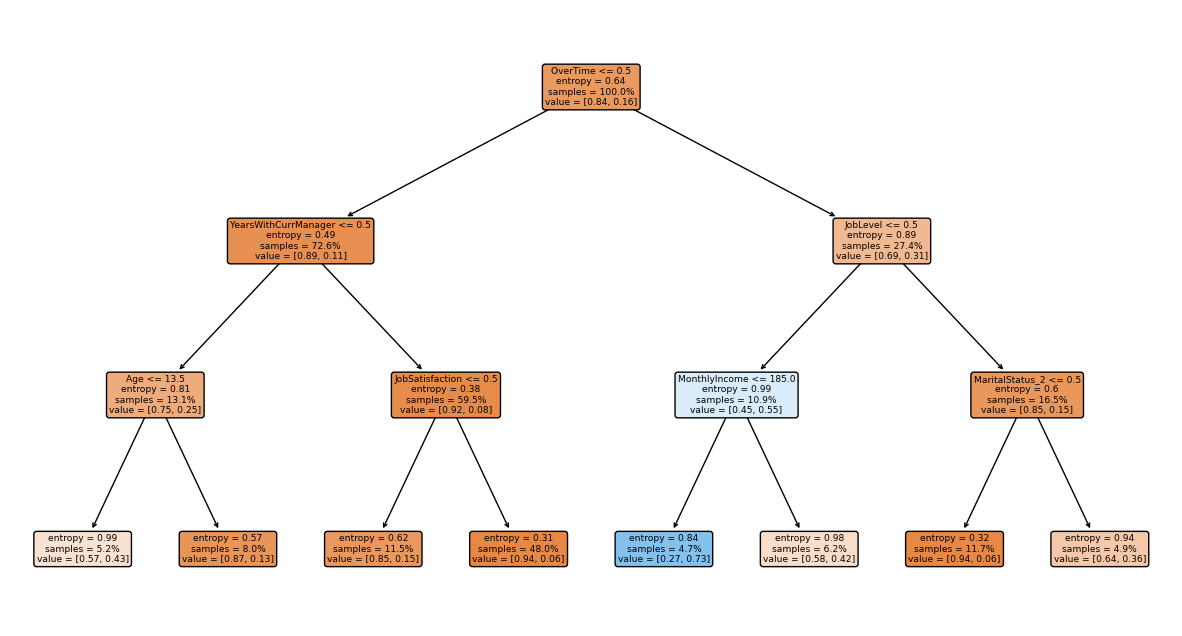

In [ ]:
plt.figure(figsize=(15,8))
tree.plot_tree(clf,feature_names=cols,filled=True,precision=2,proportion=True,rounded=True)
plt.show()